DATA_SET: ../data/data-SNF3.csv

Best n estimators: 
96

R2: 0.39734527086261673
EVS: 0.3973452708626166
MAE: 47.96676167692683
MSE: 4382.176873775554
Feature ranking:
1. Benadering_Volledige sternotomie (0.157732)
2. Benadering_U (0.128495)
3. Benadering_Antero lateraal rechts (0.067637)
4. HLM_J (0.053857)
5. HLM_N (0.053364)
6. Aorta chirurgie_J (0.052902)
7. Dagdeel_Avond (0.047419)
8. Aorta chirurgie_N (0.040282)
9. Casustype_Electief (0.039926)
10. MVR_J (0.037546)


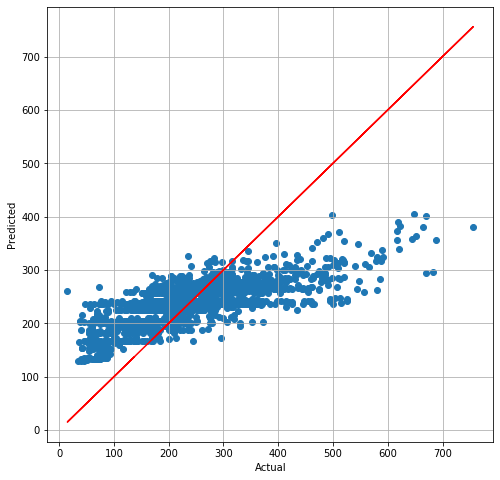


cross validation score: 
0.11432766678949227




In [14]:
#######################################################################################################
# Import libraries
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
#######################################################################################################

# data_set = ['../data/data-SNA1.csv', '../data/data-SNF1.csv', '../data/data-SNA3.csv', '../data/data-SNF3.csv', '../data/data-MNF1.csv', '../data/data-MNA1.csv', '../data/data-MNF3.csv', '../data/data-MNA3.csv']
data_set = ["../data/data-SNF3.csv"]

used_max_depth = 5
used_lr = 0.1 


for i in data_set:
    print("DATA_SET: " + i)
    X = pd.read_csv(i)
    y = X.pop('Operatieduur').values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    model = GradientBoostingRegressor(
        n_estimators=100,
#         max_depth=used_max_depth,
        random_state=0
    )
    model.fit(X_train, y_train)
    
    errors = [mean_squared_error(y_test, y_pred) for y_pred in model.staged_predict(X_test)]
    best_n_estimators = np.argmin(errors)
    
    print("\nBest n estimators: ")
    print(best_n_estimators)
    
    model = GradientBoostingRegressor(
        n_estimators=best_n_estimators,
        max_depth=used_max_depth,
        learning_rate=used_lr,
        random_state=0
    )
    model.fit(X, y)

    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    predicted = model.predict(X)
    print('\nR2:', r2_score(y, predicted))
    print('EVS:', explained_variance_score(y, predicted))
    print('MAE:', mean_absolute_error(y, predicted))
    print('MSE:', mean_squared_error(y, predicted))


    # Print the feature ranking
    print("Feature ranking:")

    for f in range(10):
        print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

    plt.figure(figsize=[8.0,8.0])
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.scatter(y, predicted)
    plt.plot(y, y, color='r')
    plt.grid(True)
    plt.show()

    score = np.mean(cross_val_score(model, X, y, cv=10, scoring='r2'))
    print("\ncross validation score: ")
    print(score)
    print("\n")